In [2]:
import os
import time
import shutil
import itertools

In [3]:
pip install opencv-python

                                              0.0/38.1 MB ? eta -:--:--
                                              0.2/38.1 MB 5.3 MB/s eta 0:00:08
                                              0.4/38.1 MB 5.5 MB/s eta 0:00:07
                                              0.6/38.1 MB 4.6 MB/s eta 0:00:09
                                              0.7/38.1 MB 4.0 MB/s eta 0:00:10
                                              0.8/38.1 MB 3.7 MB/s eta 0:00:11
                                              0.9/38.1 MB 3.7 MB/s eta 0:00:10
     -                                        1.0/38.1 MB 3.5 MB/s eta 0:00:11
     -                                        1.2/38.1 MB 3.6 MB/s eta 0:00:11
     -                                        1.4/38.1 MB 3.4 MB/s eta 0:00:11
     -                                        1.4/38.1 MB 3.3 MB/s eta 0:00:12
     -                                        1.6/38.1 MB 3.3 MB/s eta 0:00:12
     -                                        1.9/38.1 MB 3

In [3]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

In [6]:
pip install tensorflow==1.2.0 --ignore-installed


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==1.2.0


In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


## read data

In [6]:
data_dir =r"C:\Users\swethareddy\OneDrive\Desktop\MP5\hmnist_28_28_RGB.csv"

In [7]:
data = pd.read_csv(data_dir)

In [8]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


## Split data and labels

In [9]:
Label = data["label"]
Data = data.drop(columns=["label"])

In [10]:
data["label"].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

## Handling imbalanced datasets

In [11]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)



Shape of Data : (46935, 28, 28, 3)


In [12]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

## Convert abbreviations to it's words

In [44]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),

           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

# 

## train_test_split

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(35201,)
(11734, 28, 28, 3)
(11734,)


## Convert labels to categorical types

In [32]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install keras==2.1.5 -i 

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\swethareddy\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\swethareddy\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\swethareddy\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\swethareddy\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\swethareddy\anaconda3\python.exe -m pip install [options] <archive url/path> ...

-i option requires 1 argument


In [27]:
pip install keras-utils


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2658 sha256=fa2fcf34ec3a3c1193f1993edfbd649dc15a2852e7a67c9e88be4ae96af99256
  Stored in directory: c:\users\swethareddy\appdata\local\pip\cache\wheels\84\04\c8\f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras-utils
Note: you may need to restart the kernel to use updated packages.


In [28]:
from keras.utils import np_utils


ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\swethareddy\anaconda3\Lib\site-packages\keras\utils\__init__.py)

In [29]:
pip install --upgrade keras tensorflow


                                              0.0/1.7 MB ? eta -:--:--
     --                                       0.1/1.7 MB 2.2 MB/s eta 0:00:01
     ----                                     0.2/1.7 MB 2.1 MB/s eta 0:00:01
     -----                                    0.2/1.7 MB 1.8 MB/s eta 0:00:01
     -----                                    0.2/1.7 MB 1.8 MB/s eta 0:00:01
     -------                                  0.3/1.7 MB 1.4 MB/s eta 0:00:02
     -------                                  0.3/1.7 MB 1.3 MB/s eta 0:00:02
     --------                                 0.4/1.7 MB 1.2 MB/s eta 0:00:02
     --------                                 0.4/1.7 MB 1.1 MB/s eta 0:00:02
     ---------                                0.4/1.7 MB 1.0 MB/s eta 0:00:02
     --------------                           0.6/1.7 MB 1.3 MB/s eta 0:00:01
     ----------------                         0.7/1.7 MB 1.4 MB/s eta 0:00:01
     ------------------                       0.8/1.7 MB 1.5 MB/s eta 0

In [30]:
from tensorflow.keras.utils import to_categorical


In [33]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgen = ImageDataGenerator(rescale=(1./255))

# Create ReduceLROnPlateau to learning rate reduction

In [34]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

# Model Structure

In [35]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

# Training model

In [36]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 89s 292ms/step - loss: 1.3405 - accuracy: 0.5115 - val_loss: 0.9630 - val_accuracy: 0.6444 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 79s 287ms/step - loss: 0.5980 - accuracy: 0.8001 - val_loss: 0.4226 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 79s 286ms/step - loss: 0.3320 - accuracy: 0.8885 - val_loss: 0.3181 - val_accuracy: 0.8898 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 79s 285ms/step - loss: 0.2159 - accuracy: 0.9289 - val_loss: 0.2709 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 80s 288ms/step - loss: 0.1533 - accuracy: 0.9481 - val_loss: 0.1361 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 6/25
276/276 [==============================] - 79s 288ms/step - loss: 0.1100 - accuracy: 0.9626 - val_loss: 0.1459 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 7/25
276/276 [==============================] 

# Show training history

In [39]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

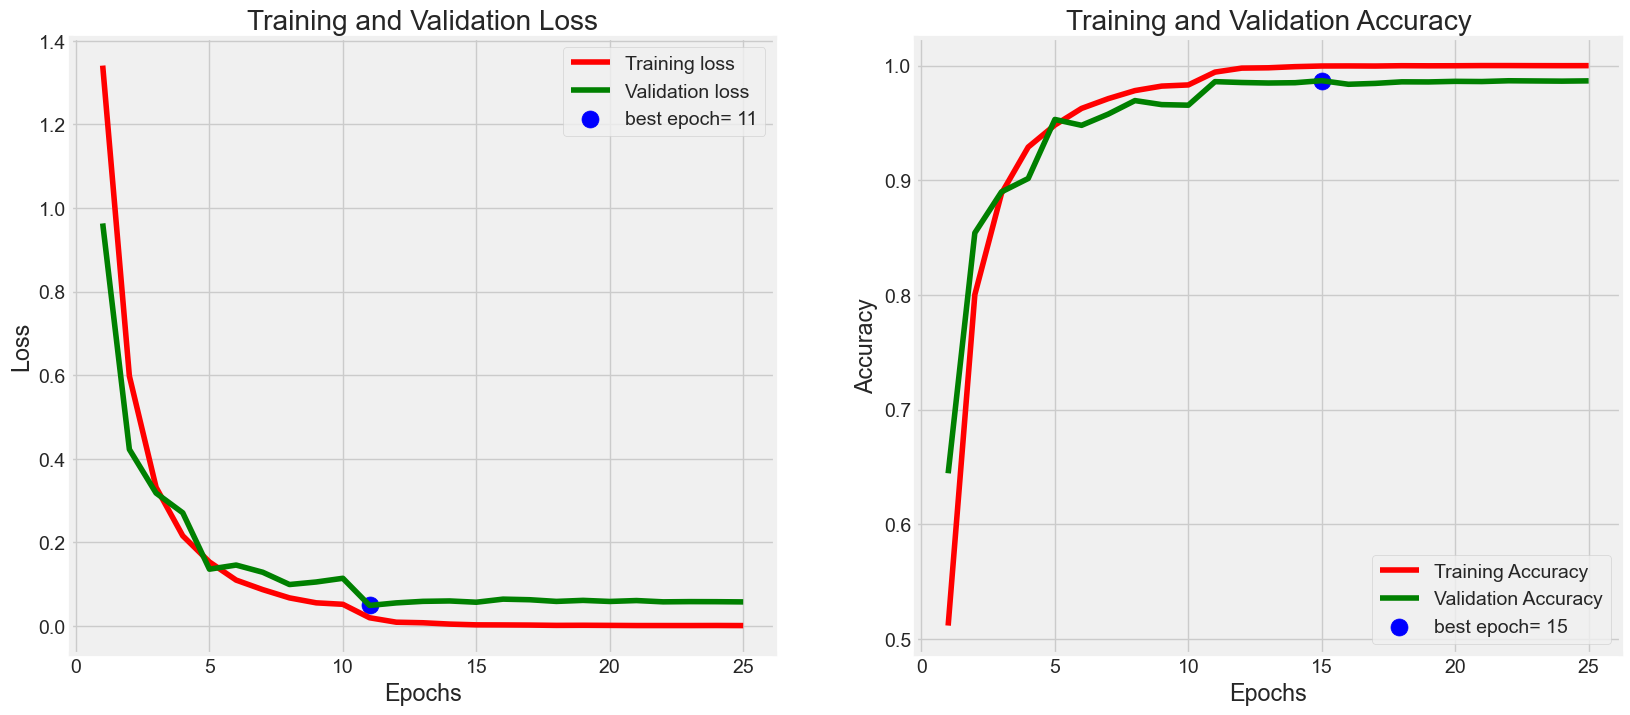

In [40]:
plot_training(history)

# model evaluation

In [41]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 7s 19ms/step - loss: 0.0578 - accuracy: 0.9866
Train Loss:  0.00023005579714663327
Train Accuracy:  1.0
--------------------
Test Loss:  0.05780619755387306
Test Accuracy:  0.9866200685501099


In [42]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_true , axis=1)

367/367 [==============================] - 10s 19ms/step


Create classes labels

In [45]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


# Confusion matrix

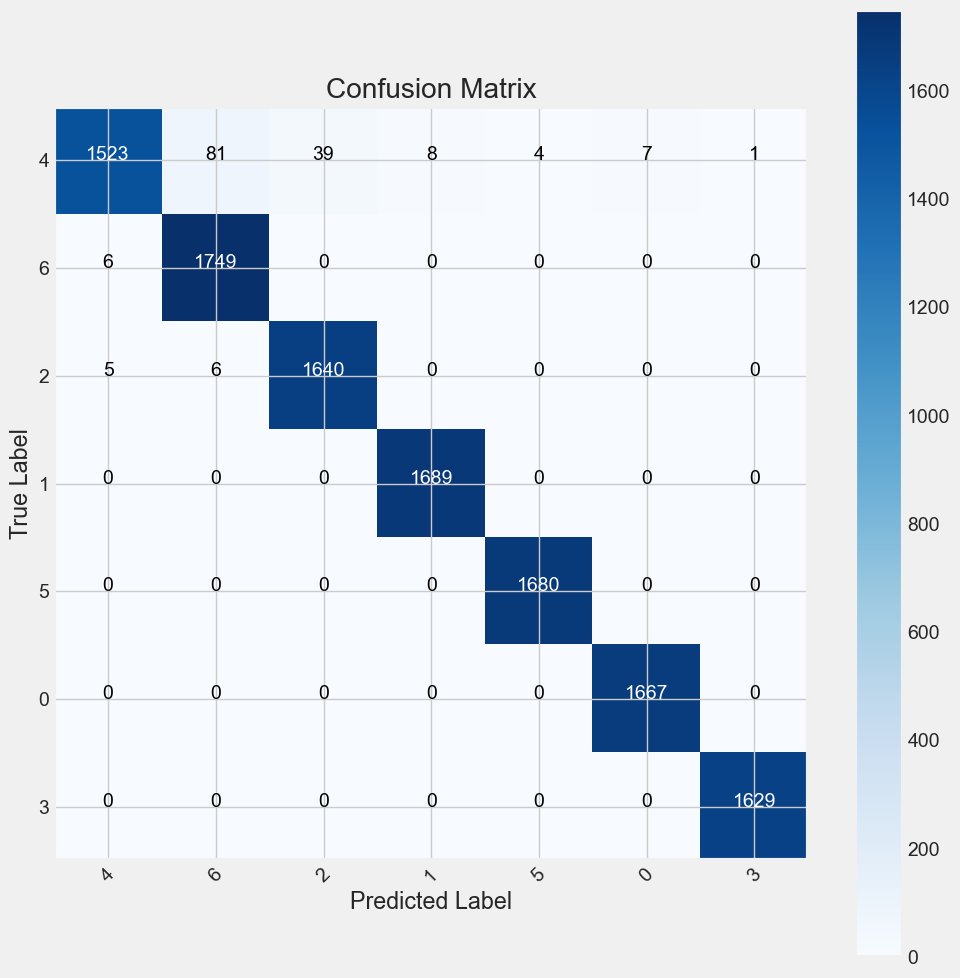

In [46]:
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# Save model

In [47]:
model.save('Skin Cancer.h5')

In [51]:
import pickle
# Assuming 'model' is your trained CNN model
with open('Skin Cancer.h5', 'wb') as model_file:
    pickle.dump(model, model_file)


In [52]:
with open('Skin Cancer.h5', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
